In [4]:
# https://www.tensorflow.org/guide/gpu
# Logging device placement

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# tf.debugging.set_log_device_placement(True)

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
K = len(np.unique(y_train)) # Number of Classes

# Normalize pixel values: Image data preprocessing
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0) # axis=0: mean of a column; Mean of each pixel
x_train = x_train - mean_image
x_test = x_test - mean_image

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

#number of output channels for each Conv2D layer is controlled by the first argument
model = models.Sequential()

# As we go deeper into the model height and widht shrinks
# So we can increase the convolution channels

# 32, 3x3 convolutions
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='C32'))
model.add(layers.MaxPooling2D((2, 2)))

# 64, 3x3 convolutions
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='C64_1'))
model.add(layers.MaxPooling2D((2, 2)))

# 64, 3x3 convolutions
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='C64_2'))
model.add(layers.MaxPooling2D((2, 2)))

#feeding the last output tensor from the convolutional base 
#  (of shape (None, 2, 2, 64)) into one or more Dense layers
# Dense layers take vectors as input

model.add(layers.Flatten()) # Make the (None, 2, 2, 64) tensor flat
model.add(layers.Dense(64, activation='relu', name='F64'))

# CIFAR has 10 output classes, final Dense layer should have 10 outputs
model.add(layers.Dense(10, name='F10'))

# Complete architecture of the model
model.summary()

# An optimizer is one of the two arguments required for compiling a Keras model:
# hyperparameter - whose value is used to control the learning process
# momentum: float hyperparameter() >= 0 that accelerates gradient descent 
#  in the relevant direction and dampens oscillations.
# Defaults to 0, i.e., vanilla gradient descent.

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.4e-2, momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=50, epochs=10, 
                    validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C32 (Conv2D)                 (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
C64_1 (Conv2D)               (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
C64_2 (Conv2D)               (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

313/313 - 5s - loss: 0.8984 - accuracy: 0.7113
0.7113000154495239


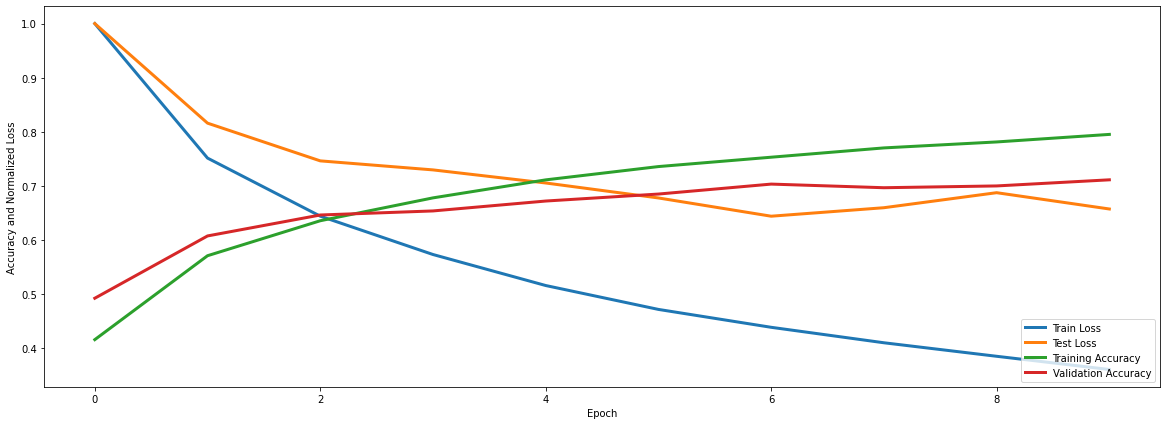

In [5]:
plt.figure(figsize=(20,7))
plt.plot(history.history['loss']/np.max(history.history['loss']), linewidth=3, label = 'Train Loss')
plt.plot(history.history['val_loss']/np.max(history.history['val_loss']), linewidth=3, label = 'Test Loss')
plt.plot(history.history['accuracy'], linewidth=3, label = "Training Accuracy")
plt.plot(history.history['val_accuracy'],  linewidth=3, label =  "Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Normalized Loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)